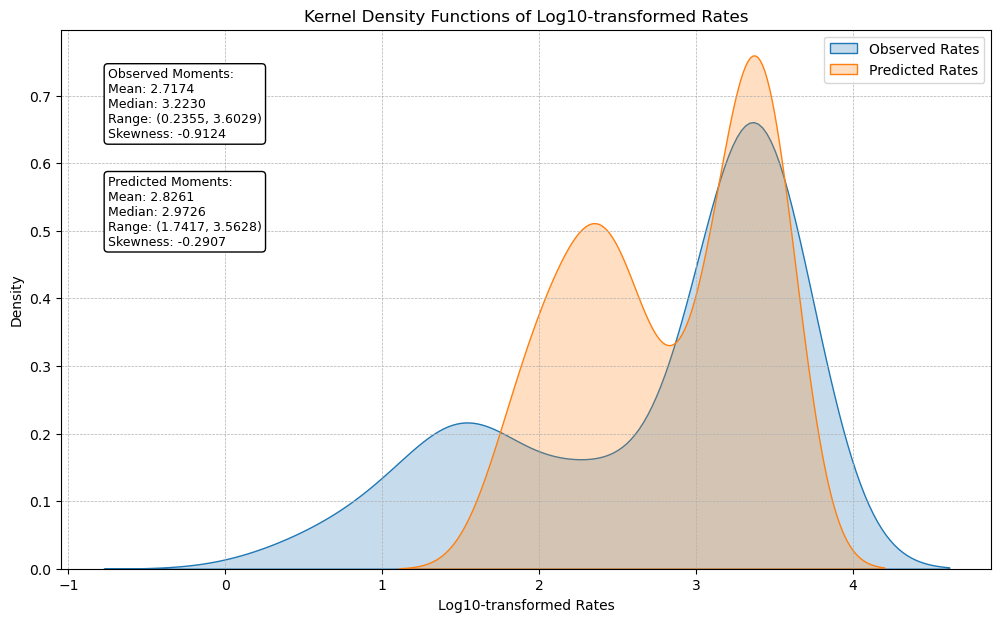

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)

# Log10-transform the rates
file_1["Log_" + column_name_Obs] = np.log10(file_1[column_name_Obs])
file_1["Log_" + column_name_Pred] = np.log10(file_1[column_name_Pred])

# Compute distribution moments for observed and predicted rates
def compute_moments(data):
    return {
        'mean': data.mean(),
        'median': data.median(),
        'range': (data.min(), data.max()),
        'skewness': skew(data)
    }

observed_moments = compute_moments(file_1["Log_" + column_name_Obs])
predicted_moments = compute_moments(file_1["Log_" + column_name_Pred])

# Plotting
plt.figure(figsize=(12, 7))

# Kernel density plot
sns.kdeplot(file_1["Log_" + column_name_Obs], fill=True, label="Observed Rates")
sns.kdeplot(file_1["Log_" + column_name_Pred], fill=True, label="Predicted Rates")

# Annotating distribution moments on the plot
y_offset = 0.02
for label, moments in zip(['Observed', 'Predicted'], [observed_moments, predicted_moments]):
    annotation = f"{label} Moments:\nMean: {moments['mean']:.4f}\nMedian: {moments['median']:.4f}\nRange: ({moments['range'][0]:.4f}, {moments['range'][1]:.4f})\nSkewness: {moments['skewness']:.4f}"
    plt.annotate(annotation, xy=(0.05, 0.95 - y_offset), xycoords='axes fraction', fontsize=9, ha='left', va='top', bbox=dict(boxstyle="round", fc="w"))
    y_offset += 0.2

plt.title("Kernel Density Functions of Log10-transformed Rates")
plt.xlabel("Log10-transformed Rates")
plt.ylabel("Density")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


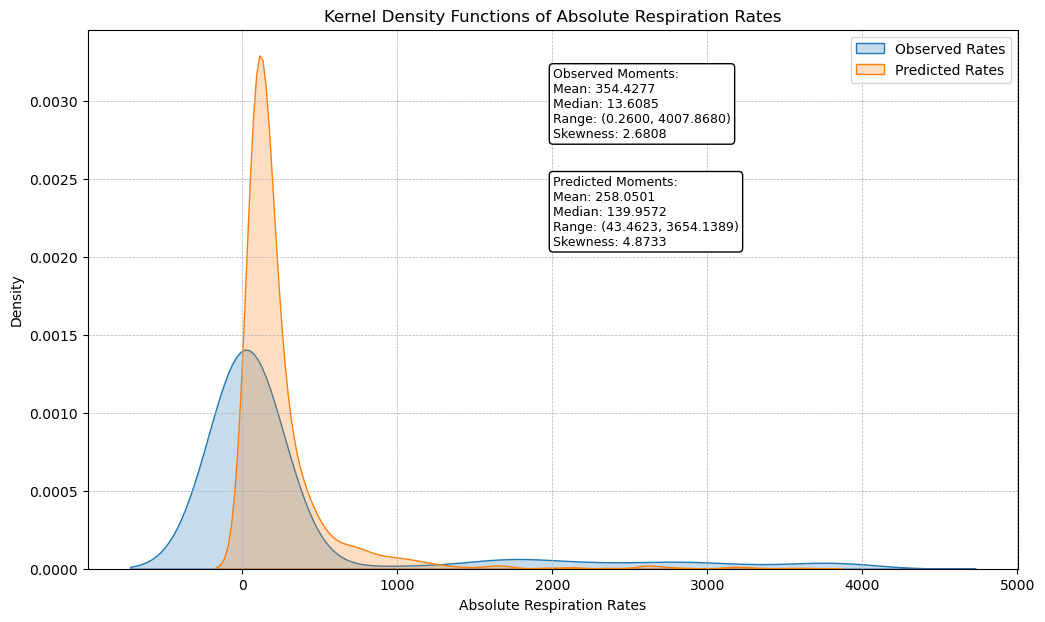

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values from 'observed_rates'
observed_rates = file_1[column_name_Obs][(file_1[column_name_Obs] != -9999.0) & (~file_1[column_name_Obs].isna())]

# Remove NaNs and -9999.0 values from 'predicted_rates'
predicted_rates = file_1[column_name_Pred][(file_1[column_name_Pred] != -9999.0) & (~file_1[column_name_Pred].isna())]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)

# Convert negative values to positive values
observed_rates = observed_rates.abs()
predicted_rates = predicted_rates.abs()

# Compute distribution moments for observed and predicted rates
def compute_moments(data):
    return {
        'mean': data.mean(),
        'median': data.median(),
        'range': (data.min(), data.max()),
        'skewness': skew(data)
    }

observed_moments = compute_moments(observed_rates)
predicted_moments = compute_moments(predicted_rates)

# Plotting
plt.figure(figsize=(12, 7))

# Kernel density plot
sns.kdeplot(observed_rates, fill=True, label="Observed Rates")
sns.kdeplot(predicted_rates, fill=True, label="Predicted Rates")

# Annotating distribution moments on the plot

x_offset = -0.5
y_offset = 0.02
for label, moments in zip(['Observed', 'Predicted'], [observed_moments, predicted_moments]):
    annotation = f"{label} Moments:\nMean: {moments['mean']:.4f}\nMedian: {moments['median']:.4f}\nRange: ({moments['range'][0]:.4f}, {moments['range'][1]:.4f})\nSkewness: {moments['skewness']:.4f}"
    plt.annotate(annotation, xy=(1 + x_offset, 0.95 - y_offset), xycoords='axes fraction', fontsize=9, ha='left', va='top', bbox=dict(boxstyle="round", fc="w"))
    y_offset += 0.2

plt.title("Kernel Density Functions of Absolute Respiration Rates")
plt.xlabel("Absolute Respiration Rates")
plt.ylabel("Density")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


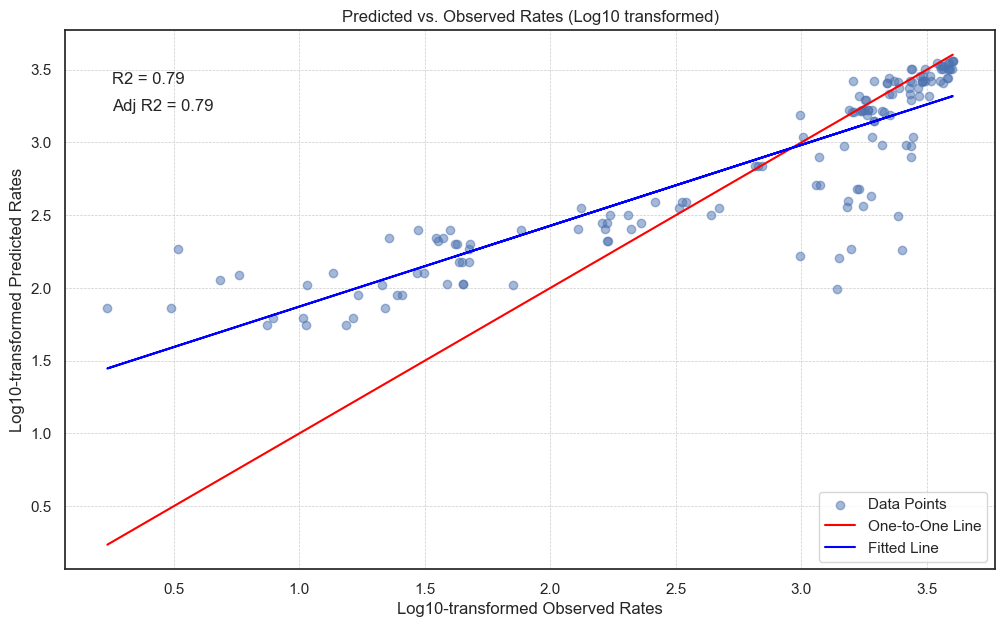

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)

# Log10-transform the rates
log_observed_rates = np.log10(file_1[column_name_Obs])
log_predicted_rates = np.log10(file_1[column_name_Pred])

# Scatter plot for observed vs predicted
plt.figure(figsize=(12, 7))
plt.scatter(log_observed_rates, log_predicted_rates, alpha=0.5, label="Data Points")

# One-to-one line
limits = [min(log_observed_rates.min(), log_predicted_rates.min()), max(log_observed_rates.max(), log_predicted_rates.max())]
plt.plot(limits, limits, color="red", label="One-to-One Line")

# Fitted regression line
slope, intercept, _, _, _ = linregress(log_observed_rates, log_predicted_rates)
plt.plot(log_observed_rates, slope * log_observed_rates + intercept, color="blue", label="Fitted Line")

# Calculate R-squared (R2) value
r2 = r2_score(log_observed_rates, slope * log_observed_rates + intercept)

# Calculate adjusted R-squared (adj R2) value (assuming you have the number of observations n)
n = len(log_observed_rates)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - 2)

plt.title("Predicted vs. Observed Rates (Log10 transformed)")
plt.xlabel("Log10-transformed Observed Rates")
plt.ylabel("Log10-transformed Predicted Rates")
plt.legend(loc='lower right')

# Display R2 and adj R2 values in the plot
plt.annotate(f"R2 = {r2:.2f}", (0.05, 0.9), xycoords='axes fraction')
plt.annotate(f"Adj R2 = {adj_r2:.2f}", (0.05, 0.85), xycoords='axes fraction')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



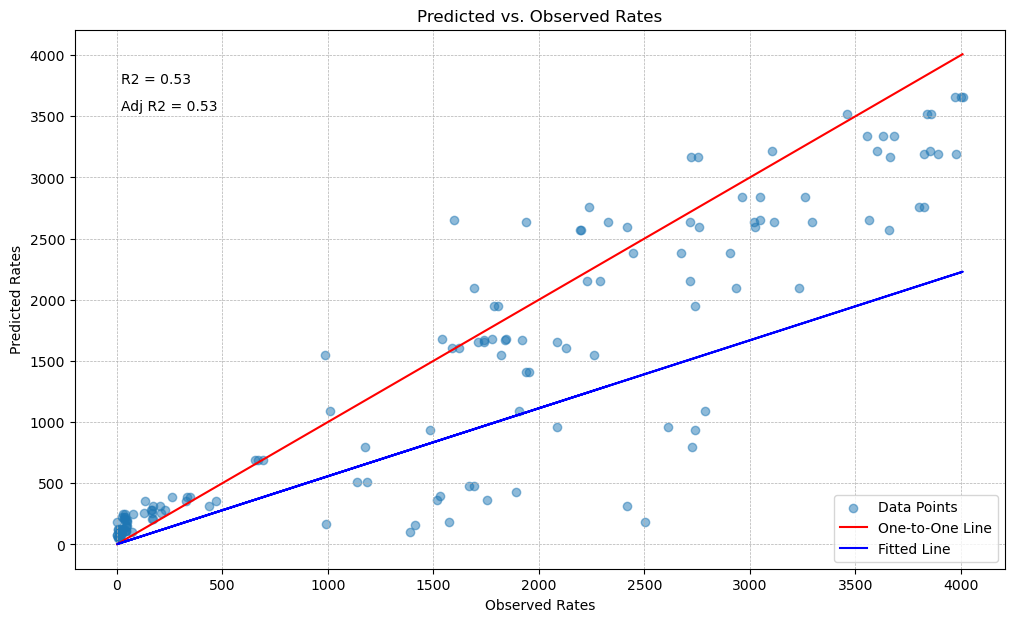

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)

# Scatter plot for observed vs predicted
plt.figure(figsize=(12, 7))
plt.scatter(file_1[column_name_Obs], file_1[column_name_Pred], alpha=0.5, label="Data Points")

# One-to-one line
limits = [min((file_1[column_name_Obs]).min(), (file_1[column_name_Pred]).min()), max((file_1[column_name_Obs]).max(), (file_1[column_name_Pred]).max())]
plt.plot(limits, limits, color="red", label="One-to-One Line")

# Fitted regression line
slope, intercept, _, _, _ = linregress(log_observed_rates, log_predicted_rates)
plt.plot(file_1[column_name_Obs], slope * file_1[column_name_Obs] + intercept, color="blue", label="Fitted Line")

# Calculate R-squared (R2) value
r2 = r2_score(file_1[column_name_Obs], slope * file_1[column_name_Obs] + intercept)

# Calculate adjusted R-squared (adj R2) value (assuming you have the number of observations n)
n = len(file_1[column_name_Obs])
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - 2)

plt.title("Predicted vs. Observed Rates")
plt.xlabel("Observed Rates")
plt.ylabel("Predicted Rates")
plt.legend(loc='lower right')

# Display R2 and adj R2 values in the plot
plt.annotate(f"R2 = {r2:.2f}", (0.05, 0.9), xycoords='axes fraction')
plt.annotate(f"Adj R2 = {adj_r2:.2f}", (0.05, 0.85), xycoords='axes fraction')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



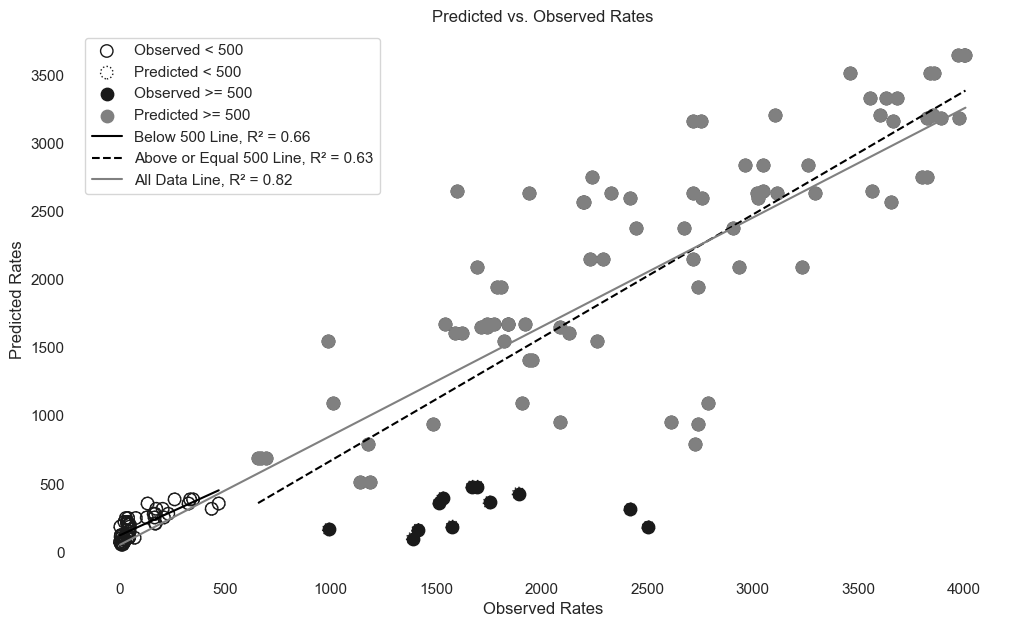

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)
# Split data based on the condition
below_500 = file_1[(file_1[column_name_Obs] < 500) & (file_1[column_name_Pred] < 500)]
above_500 = file_1[(file_1[column_name_Obs] >= 500) | (file_1[column_name_Pred] >= 500)]
# Set the seaborn style for plotting
sns.set_theme(style="white")

# Plotting
plt.figure(figsize=(12, 7))

# Observed data points below 500 in hollow black circles
below_500_obs = file_1[file_1[column_name_Obs] < 500]
plt.scatter(below_500_obs[column_name_Obs], below_500_obs[column_name_Pred], facecolors='none', edgecolors='k', label="Observed < 500", s=80)

# Predicted data points below 500 in hollow black circles with dotted circumference
below_500_pred = file_1[file_1[column_name_Pred] < 500]
plt.scatter(below_500_pred[column_name_Obs], below_500_pred[column_name_Pred], facecolors='none', edgecolors='k', linestyle=':', label="Predicted < 500", s=80)

# Observed data points above 500 in solid black circles
above_500_obs = file_1[file_1[column_name_Obs] >= 500]
plt.scatter(above_500_obs[column_name_Obs], above_500_obs[column_name_Pred], color='k', label="Observed >= 500", s=80)

# Predicted data points above 500 in solid gray circles
above_500_pred = file_1[file_1[column_name_Pred] >= 500]
plt.scatter(above_500_pred[column_name_Obs], above_500_pred[column_name_Pred], color='gray', label="Predicted >= 500", s=80)

# Define a function to plot regression lines and calculate R-squared
def plot_regression_and_r2(data, label, linestyle, color):
    if not data.empty:
        slope, intercept, r_value, _, _ = linregress(data[column_name_Obs], data[column_name_Pred])
        line_x = np.linspace(data[column_name_Obs].min(), data[column_name_Obs].max(), 100)
        line_y = slope * line_x + intercept
        plt.plot(line_x, line_y, linestyle=linestyle, color=color, label=f'{label} Line, R² = {r_value**2:.2f}')

# Plot regression lines with specified colors and styles
plot_regression_and_r2(file_1[file_1[column_name_Obs] < 500], 'Below 500', '-', 'black')
plot_regression_and_r2(file_1[(file_1[column_name_Obs] >= 500) | (file_1[column_name_Pred] >= 500)], 'Above or Equal 500', '--', 'black')
plot_regression_and_r2(file_1, 'All Data', '-', 'grey')


plt.title("Predicted vs. Observed Rates")
plt.xlabel("Observed Rates")
plt.ylabel("Predicted Rates")
plt.legend(loc='upper left')

# Ensure the background is white with no grids
sns.despine(left=True, bottom=True)
plt.grid(False)

plt.show()




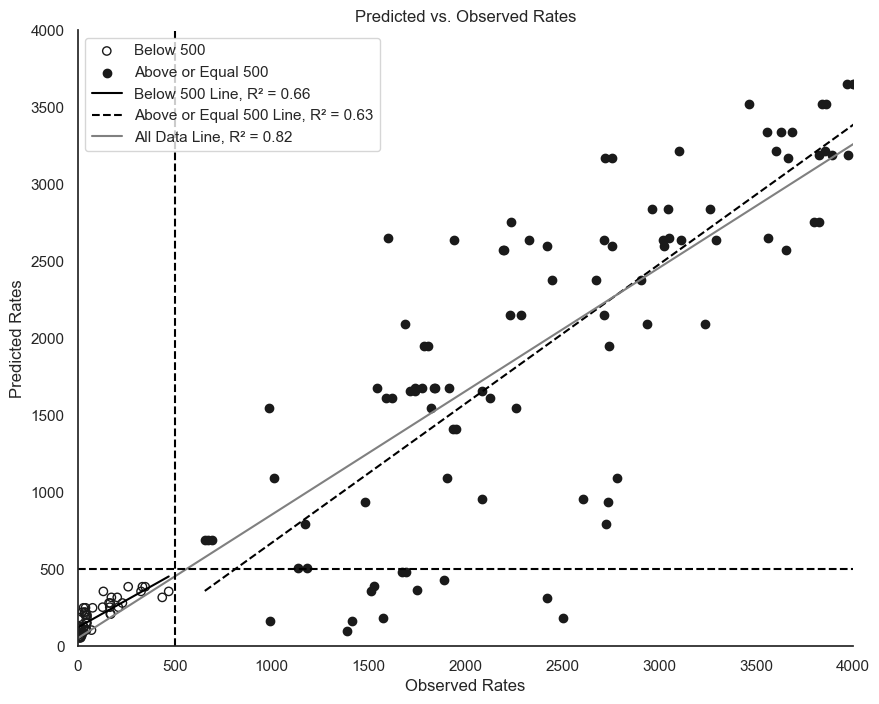

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()

# Reset the index
file_1 = file_1.reset_index(drop=True)
# Split data based on the condition
below_500 = file_1[(file_1[column_name_Obs] < 500) & (file_1[column_name_Pred] < 500)]
above_500 = file_1[(file_1[column_name_Obs] >= 500) | (file_1[column_name_Pred] >= 500)]
# Set the seaborn style for plotting
sns.set_theme(style="white")

# Plotting with increased size
plt.figure(figsize=(10, 8))  # Increase figure size

# Data points below 500 in hollow black circles
plt.scatter(below_500[column_name_Obs], below_500[column_name_Pred], facecolors='none', edgecolors='k', label="Below 500")

# Data points above 500 in solid black circles
plt.scatter(above_500[column_name_Obs], above_500[column_name_Pred], color='k', label="Above or Equal 500")

# Define a function to plot regression lines and calculate R-squared
def plot_regression_and_r2(data, label, linestyle, color):
    if not data.empty:
        slope, intercept, r_value, _, _ = linregress(data[column_name_Obs], data[column_name_Pred])
        line_x = np.linspace(data[column_name_Obs].min(), data[column_name_Obs].max(), 100)
        line_y = slope * line_x + intercept
        plt.plot(line_x, line_y, linestyle=linestyle, color=color, label=f'{label} Line, R² = {r_value**2:.2f}')

# Plot regression lines with specified colors and styles
plot_regression_and_r2(file_1[file_1[column_name_Obs] < 500], 'Below 500', '-', 'black')
plot_regression_and_r2(file_1[(file_1[column_name_Obs] >= 500) | (file_1[column_name_Pred] >= 500)], 'Above or Equal 500', '--', 'black')
plot_regression_and_r2(file_1, 'All Data', '-', 'grey')

# Draw a vertical double dashed line at Log10-transform of 500
plt.axvline(x=500, linestyle='--', color='black')
plt.axhline(y=500, linestyle='--', color='black')

plt.title("Predicted vs. Observed Rates")
plt.xlabel("Observed Rates")
plt.ylabel("Predicted Rates")
# Place the legend outside the plot
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()

# Limit x-axis and y-axis from 0 to 4000
plt.xlim(0, 4000)
plt.ylim(0, 4000)

# Place the legend outside the plot, on the lower right
plt.legend(loc='upper left')

# Ensure the plot is enclosed in a box
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Ensure the background is white with no grids, but keep the box around the plot
sns.despine(left=False, bottom=False, trim=True)
plt.grid(False)

plt.show()

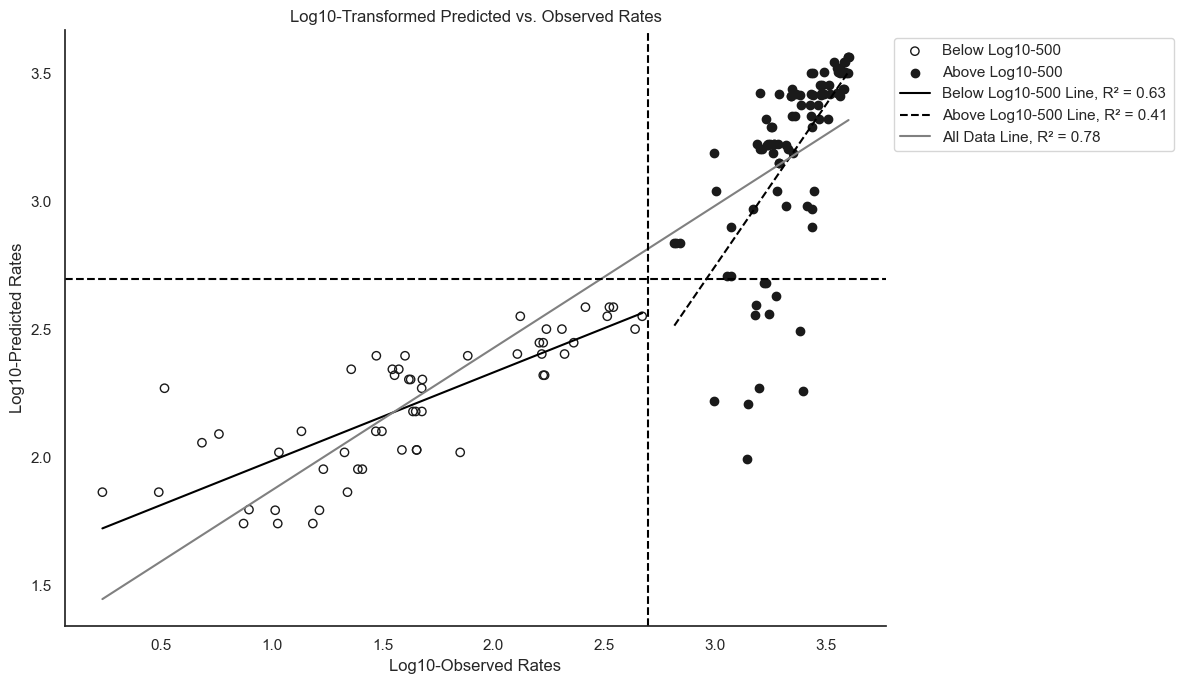

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import linregress
from sklearn.metrics import r2_score

# Load the data
file_1 = pd.read_csv("C:/Users/sushant.mehan/Downloads/MyOwnPublications/ICON_ModEx/January 2024/ICON.csv")

# Columns of interest
column_name_Pred = "Predicted_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"
column_name_Obs = "Observed_Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment"

# Remove NaNs and -9999.0 values
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (~file_1[column_name_Obs].isna())]
file_1 = file_1[(file_1[column_name_Pred] != -9999) & (~file_1[column_name_Pred].isna())]

# Take the absolute value of positive rates
file_1[column_name_Obs] = file_1[column_name_Obs].abs()
file_1[column_name_Pred] = file_1[column_name_Pred].abs()

# Filter out non-positive values
file_1 = file_1[(file_1[column_name_Obs] > 0) & (file_1[column_name_Pred] > 0)]

# Remove rows with -9999 in both Observed and Predicted
file_1 = file_1[(file_1[column_name_Obs] != -9999) & (file_1[column_name_Pred] != -9999)]

# Check if any NaN values are present and drop those rows
file_1 = file_1.dropna()


# Reset the index
file_1 = file_1.reset_index(drop=True)

# Log-transform the observed and predicted values
file_1['Log_Obs'] = np.log10(file_1[column_name_Obs])
file_1['Log_Pred'] = np.log10(file_1[column_name_Pred])

# Determine the log10 transform of 500 for comparison
log10_500 = np.log10(500)

# Take the Log10-transform of observed data and predicted values
file_1['Log_Obs'] = np.log10(file_1[column_name_Obs])
file_1['Log_Pred'] = np.log10(file_1[column_name_Pred])

# Define the Log10-transform threshold for 500
log_threshold = np.log10(500)

# Split data based on the log-transform condition
below_500_log = file_1[(file_1['Log_Obs'] < log_threshold) & (file_1['Log_Pred'] < log_threshold)]
above_500_log = file_1[(file_1['Log_Obs'] >= log_threshold) | (file_1['Log_Pred'] >= log_threshold)]

# Set the seaborn style for plotting
sns.set_theme(style="white")
plt.figure(figsize=(12, 7))

# Function to plot regression and calculate R-squared, with a check for empty data
def plot_regression_and_r2(data, label, linestyle, color):
    if not data.empty:
        slope, intercept, r_value, _, _ = linregress(data['Log_Obs'], data['Log_Pred'])
        line_x = np.linspace(data['Log_Obs'].min(), data['Log_Obs'].max(), 100)
        line_y = slope * line_x + intercept
        plt.plot(line_x, line_y, linestyle=linestyle, color=color, label=f'{label} Line, R² = {r_value**2:.2f}')

# Plot data points based on log-transform criteria
plt.scatter(below_500_log['Log_Obs'], below_500_log['Log_Pred'], facecolors='none', edgecolors='k', label="Below Log10-500")
plt.scatter(above_500_log['Log_Obs'], above_500_log['Log_Pred'], color='k', label="Above Log10-500")

# Plot regression lines for the specified scenarios
plot_regression_and_r2(below_500_log, 'Below Log10-500', '-', 'black')
plot_regression_and_r2(above_500_log, 'Above Log10-500', '--', 'black')
plot_regression_and_r2(file_1, 'All Data', '-', 'grey')

# Draw a vertical double dashed line at Log10-transform of 500
plt.axvline(x=log10_500, linestyle='--', color='black')
plt.axhline(y=log10_500, linestyle='--', color='black')

plt.title("Log10-Transformed Predicted vs. Observed Rates")
plt.xlabel("Log10-Observed Rates")
plt.ylabel("Log10-Predicted Rates")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the background is white with no grids
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.show()
